### Tarea 3 del curso CM-072

* Nombre y apellidos: Bitzer Arotoma Bacilio
* Fecha de presentación: 27 de setiembre

Esta tarea utiliza un pequeño subconjunto de los datos de la competencia de Kaggle  [Yelp Business Rating Prediction ](https://www.kaggle.com/c/yelp-recsys-2013).

* Descripción de la data
    - `yelp.json` es el formato original del archivo y `yelp.csv` contiene los mismos datos, en un formato más conveniente. Ambos archivos están en esta carpeta de la tarea, por lo que no es necesario descargar los datos del sitio web de Kaggle.


## Preguntas

1.Lee yelp.csv en un DataFrame.

In [1]:
# Tu solución
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
%matplotlib inline
df = pd.read_csv('yelp.csv')

In [2]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


/home/bitzer/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


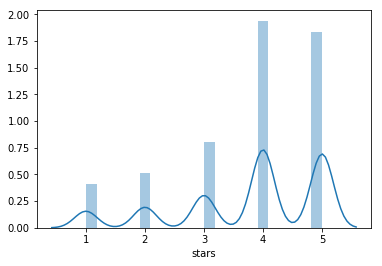

In [3]:
sns.distplot(df.stars)


2.Crea un nuevo DataFrame que solo contenga las reseñas de 5 estrellas y 1 estrella.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 10 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
dtypes: int64(4), object(6)
memory usage: 351.1+ KB


/home/bitzer/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


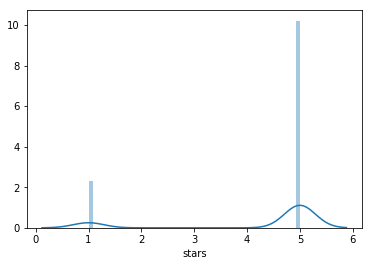

In [4]:
# Tu solucion
#lis = [1,5]
df_new = df[(df['stars'] == 1) | (df['stars'] == 5)]
df_new.info()
sns.distplot(df_new.stars)

3.Divide el nuevo DataFrame en conjuntos de entrenamiento y prueba, usando el texto de revisión como la única característica y la calificación de estrellas como respuesta.

In [5]:
# Tu solucion
X_train, X_test, y_train, y_test = train_test_split(df_new.text, df_new.stars, test_size = 0.25)


4.Usa `CountVectorizer` para crear [matrices de términos de documentos](https://en.wikipedia.org/wiki/Document-term_matrix) de `X_entrenamiento` y `X_prueba`.


In [6]:
# Tu solucion
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train_v = vectorizer.fit_transform(X_train)
X_test_v = vectorizer.transform(X_test)

5.Usa Naive Bayes para predecir la calificación de estrellas para las revisiones en el conjunto de prueba y calcula la precisión.

In [7]:
# Tu solucion
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(X_train_v, y_train)
pred = clf.predict(X_test_v)
score = accuracy_score(y_test, pred)
print("Score : ", score)

Score :  0.9148727984344422


6.Calcula el AUC.

In [8]:
# Tu solucion
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_test = y_test.replace([1, 5],[0, 1])
pred_auc = clf.predict_proba(X_test_v)[:,1]
roc_auc_score(y_test, pred_auc)

0.9384216031430175

7.Dibuja la curva ROC.

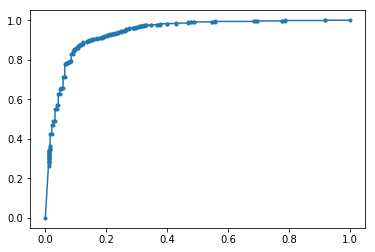

In [9]:
# Tu solucion
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, pred_auc)
plt.plot(fpr, tpr, marker='.')

8.Imprime la matriz de confusión y calcule la sensibilidad y especificidad. Comenta tus resultados.

In [10]:
# Tu solucion
from sklearn.metrics import confusion_matrix
mat_conf = confusion_matrix(y_test, pred)
print("Matriz de confusion:\n", mat_conf)
print("Sensibilidad:", mat_conf[1,2]/(mat_conf[1,1] + mat_conf[1,2]))
print("Especificidad:", mat_conf[0,1]/(mat_conf[0,1] + mat_conf[0,2]))


Matriz de confusion:
 [[  0 116  72]
 [  0  15 819]
 [  0   0   0]]
Sensibilidad: 0.9820143884892086
Especificidad: 0.6170212765957447


9.(Obligatorio) Examina el texto de la revisión para ver algunos de los falsos positivos y falsos negativos. Según tu conocimiento de cómo funciona Naive Bayes, ¿tienes alguna teoría sobre por qué el modelo clasifica incorrectamente estas evaluaciones?.

In [11]:
# Tu solucion

10.Imaginemos que deseas equilibrar la sensibilidad y la especificidad. Puedes lograr esto cambiando el umbral para predecir una revisión de 5 estrellas. ¿Qué umbral equilibra aproximadamente la sensibilidad y la especificidad?.

Sugerencia: Leer-->[Classification vs. Prediction](http://www.fharrell.com/post/classification/).

In [12]:
# Tu solucion

11.(Obligatorio) Veamos qué tan bien se comporta Naive Bayes cuando se incluyen todas las revisiones, en lugar de solo reseñas de 1 estrella y 5 estrellas:
    * Define X e y usando el DataFrame original del paso 1 (debe contener 5 clases diferentes).
    * Divide los datos en conjuntos de entrenamiento y prueba.
    * Calcula la precisión de prueba de un modelo de Naive Bayes.
    * Compara la precisión de la prueba con la precisión nula.
    * Muestra la matriz de confusión.
    * Comenta los resultados.

In [13]:
# Tu solucion

12.(Obligatorio) Lee el siguiente artículo de Paul Graham: [A Plan for Spam](http://www.paulgraham.com/spam.html) y responde las siguientes preguntas:
    * ¿Debería un filtro de spam optimizar la sensibilidad o la especificidad, en opinión de Graham?.
    * Antes de probar el "enfoque estadístico" para el filtrado de spam, ¿cuál era su enfoque?.
    * ¿Cuáles son los componentes clave de su sistema de filtrado estadístico? En otras palabras, ¿cómo funciona?.
    * ¿Qué menciona Graham sobre los beneficios del enfoque estadístico?.
    * ¿Qué tan bueno fue su predicción del "spam del futuro"?. 

In [14]:
# Tus respuestas